MODES:
train,val,predict


TASK:

detect,segment,classify


DATA:

format can be differ for task type,supports data.yaml,data folder,data name

**INSTALLATION**

In [ ]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.1/800.1 kB 8.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!pwd

/content


In [ ]:
!yolo task = segment mode = predict model =yolov8n-seg.pt source ="images/2.jpg"

Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 708, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 442, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 183, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 35, in generator_context
    response = gen.send(None)
  File "/usr/local/lib/

python script


In [ ]:
!yolo task = classify mode = predict model =yolov8n-cls.pt source ="images/2.jpg"

100% 5.30M/5.30M [00:00<00:00, 52.8MB/s]
Ultralytics YOLOv8.2.52 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 2715880 parameters, 0 gradients, 4.3 GFLOPs

100% 755k/755k [00:00<00:00, 11.3MB/s]
image 1/1 /content/images/2.jpg: 224x224 tabby 0.64, Egyptian_cat 0.14, tiger_cat 0.08, Persian_cat 0.06, lynx 0.02, 33.9ms
Speed: 26.3ms preprocess, 33.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


TEST TRAIN VALID 3 FOLDERS NEEDED AND ONE DATA FILE FOR STORING PATH FOR THE TRAIN AND TEST


In [ ]:
!nvidia-smi

Thu Jul 11 06:45:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.4/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/YOLOV8

/content/drive/MyDrive/YOLOV8


In [ ]:
!ls

DATA  data.yaml  preprocessed_data  runs  yolov8s.pt


**PREPROCESSING**

In [ ]:
import os
import cv2

In [ ]:
def preprocess_image(image, target_size=(640, 640)):
    # Resize the image to the target size
    resized_image = cv2.resize(image, target_size)
    return resized_image


In [ ]:
import os
import shutil

def preprocess_dataset(input_dir, output_dir, target_size=(640, 640)):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for root, dirs, files in os.walk(input_dir):
        # Skip the output directory to avoid preprocessing already preprocessed images
        if root.startswith(output_dir):
            continue

        for file in files:
            # Construct the full path to the input and output files
            input_file_path = os.path.join(root, file)
            relative_path = os.path.relpath(root, input_dir)
            output_file_path = os.path.join(output_dir, relative_path, file)

            # Create output subdirectories if they don't exist
            if not os.path.exists(os.path.dirname(output_file_path)):
                os.makedirs(os.path.dirname(output_file_path))

            # Check if the file is an image
            if file.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                # Read and preprocess the image
                image = cv2.imread(input_file_path)
                preprocessed_image = preprocess_image(image, target_size)

                # Save the preprocessed image
                cv2.imwrite(output_file_path, preprocessed_image)

            # Check if the file is a label
            elif file.endswith(('.txt', '.xml', '.json')):  # Add other label formats if needed
                # Copy the label file to the corresponding output directory
                shutil.copy(input_file_path, output_file_path)


In [ ]:
input_dir = '/content/drive/MyDrive/YOLOV8/DATA'
output_dir = '/content/drive/MyDrive/YOLOV8/preprocessed_data'


In [ ]:
preprocess_dataset(input_dir, output_dir, target_size=(640, 640))


In [ ]:
%cd /content/drive/MyDrive/YOLOV8
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=640 plots=True

/content/drive/MyDrive/YOLOV8
Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

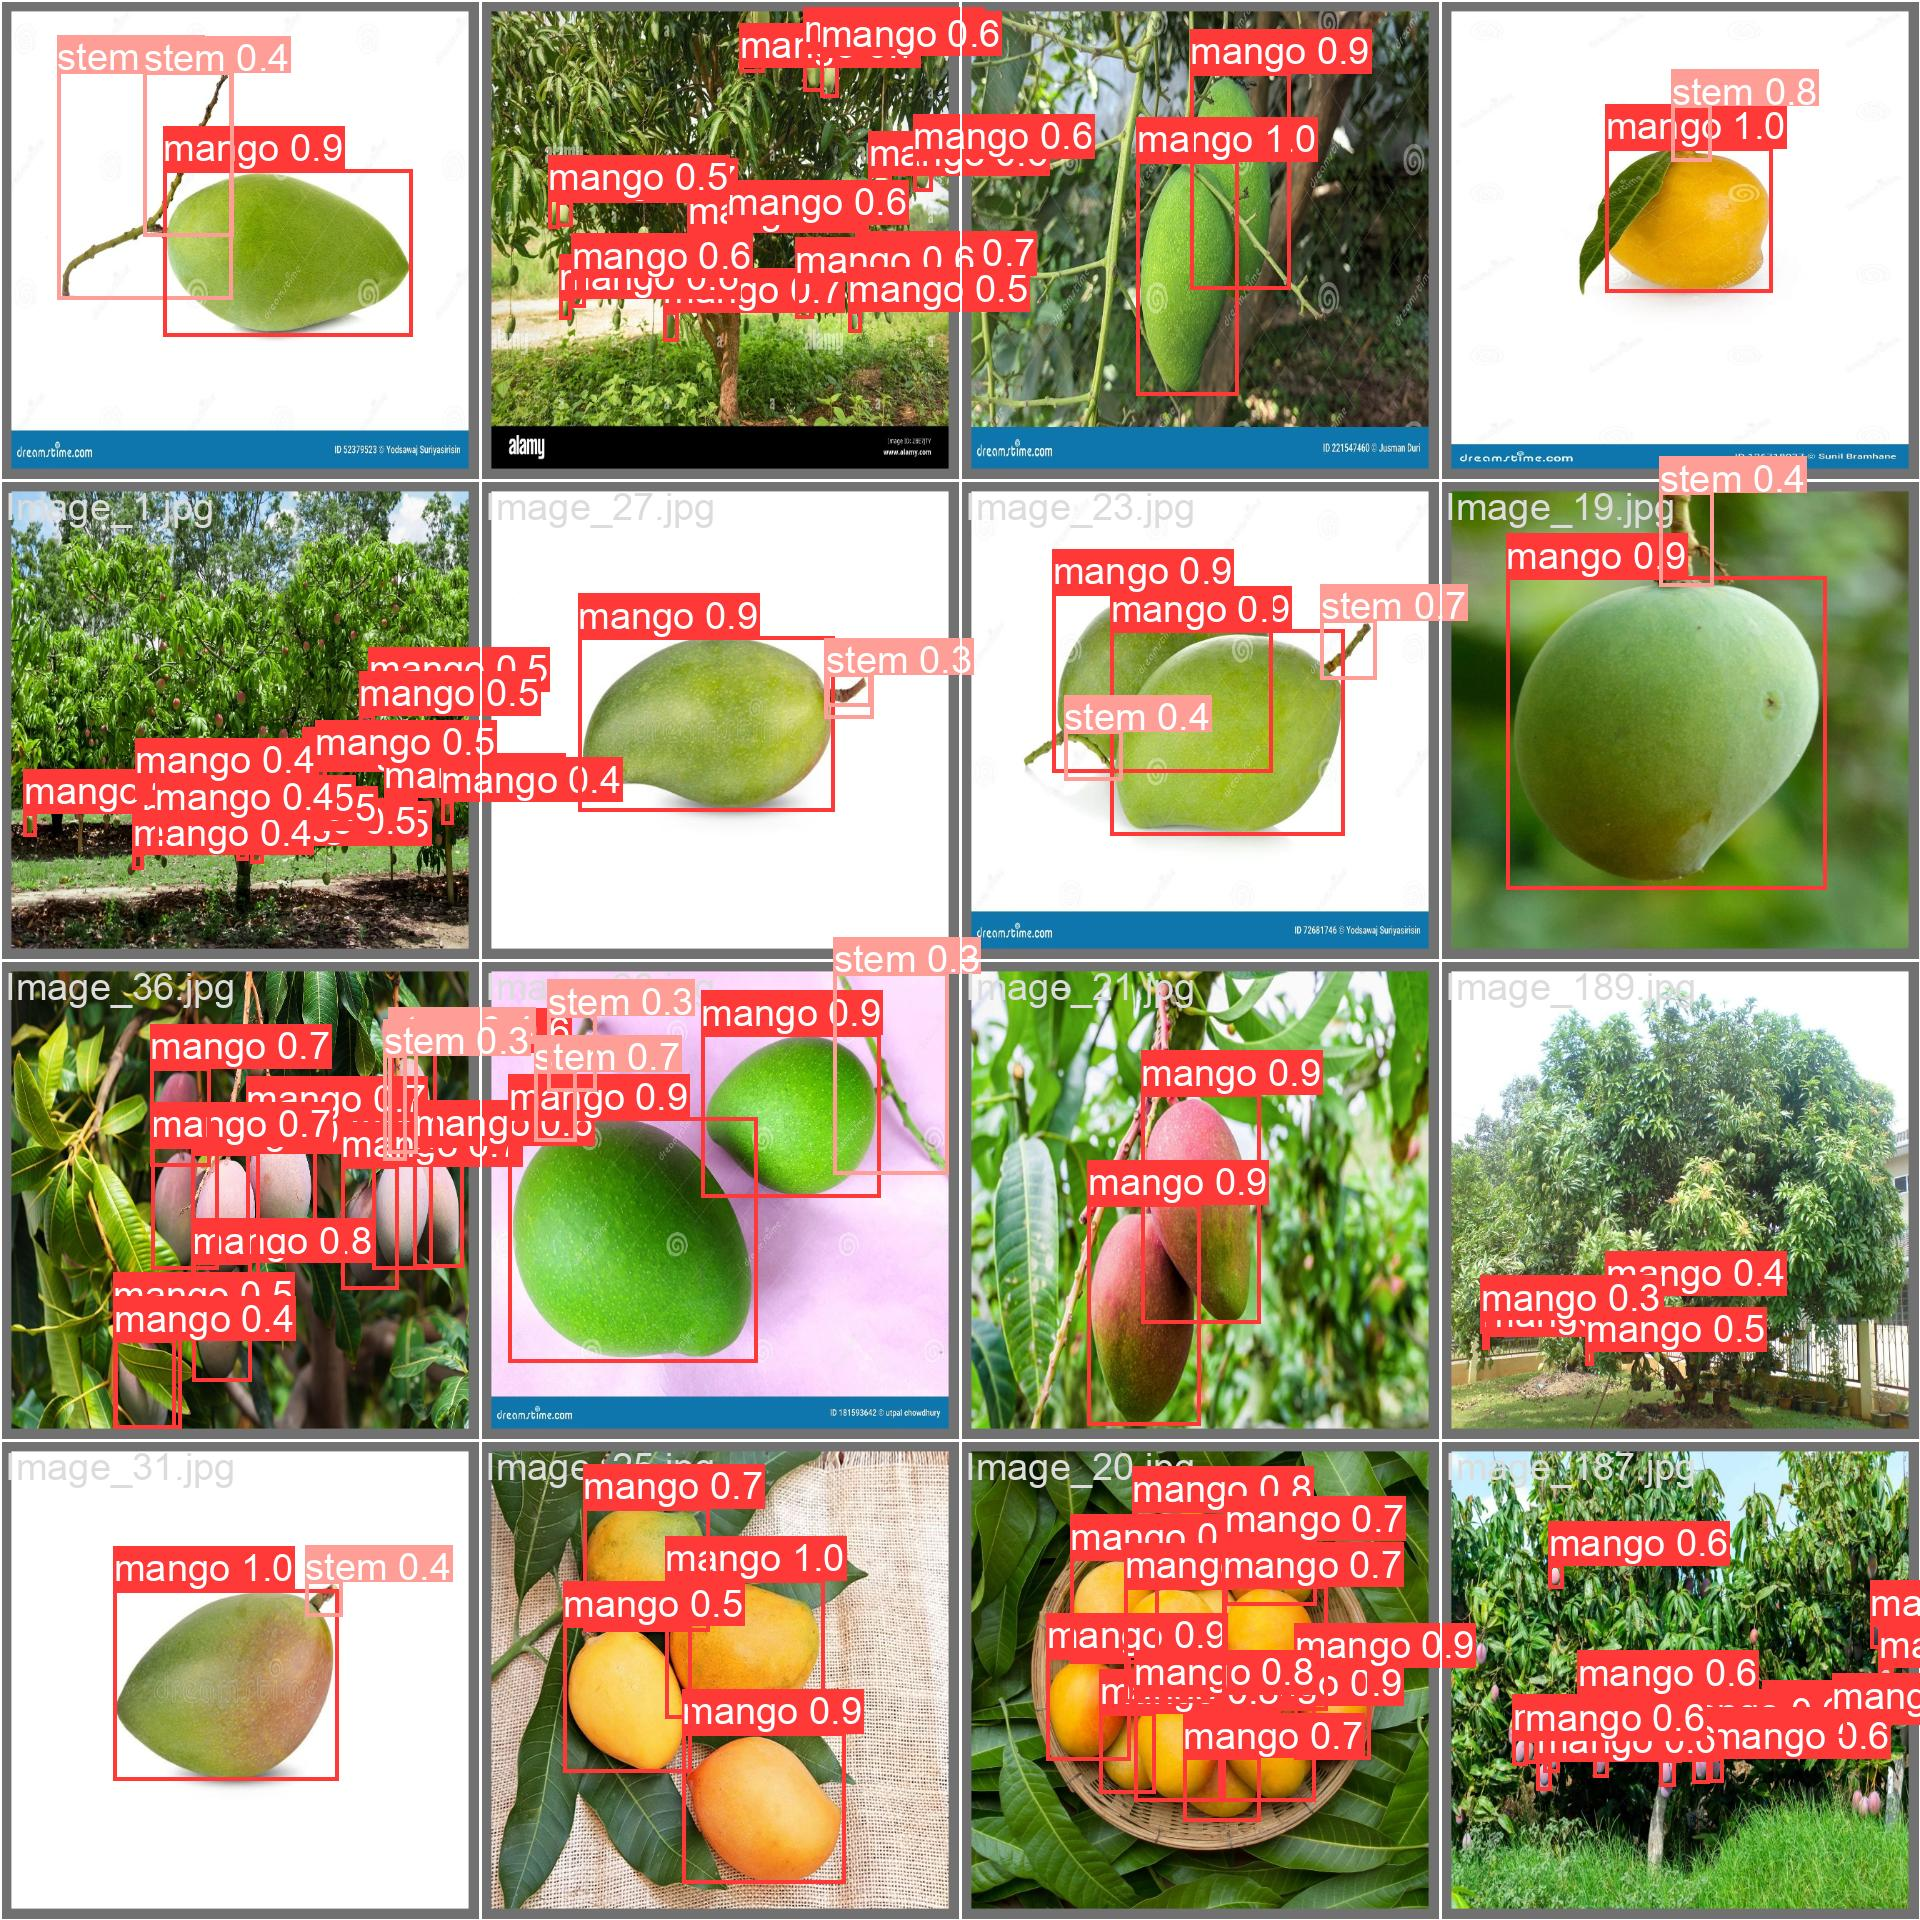

In [ ]:
Image(filename='runs/detect/train2/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=data.yaml

Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/YOLOV8/preprocessed_data/valid/labels.cache... 72 images, 4 backgrounds, 0 corrupt: 100% 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:06<00:00,  1.40s/it]
                   all         73        706      0.631      0.555      0.585      0.297
                 mango         69        506      0.759       0.76      0.802      0.455
                  stem         58        200      0.502       0.35      0.368      0.139
Speed: 8.1ms preprocess, 30.4ms inference, 0.0ms loss, 16.3ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.25 source=preprocessed_data/test/images

Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/73 /content/drive/MyDrive/YOLOV8/preprocessed_data/test/images/Image_1.jpg: 640x640 1 mango, 2 stems, 16.4ms
image 2/73 /content/drive/MyDrive/YOLOV8/preprocessed_data/test/images/Image_102.jpg: 640x640 2 mangos, 1 stem, 16.4ms
image 3/73 /content/drive/MyDrive/YOLOV8/preprocessed_data/test/images/Image_103.jpg: 640x640 1 mango, 2 stems, 16.4ms
image 4/73 /content/drive/MyDrive/YOLOV8/preprocessed_data/test/images/Image_11.jpg: 640x640 16 mangos, 9 stems, 16.4ms
image 5/73 /content/drive/MyDrive/YOLOV8/preprocessed_data/test/images/Image_111.jpg: 640x640 1 mango, 1 stem, 16.4ms
image 6/73 /content/drive/MyDrive/YOLOV8/preprocessed_data/test/images/Image_118.jpg: 640x640 2 mangos, 1 stem, 16.4ms
image 7/73 /content/drive/MyDrive/YOLOV8/preprocessed_data/test/images/Image_12.jpg: 640x640 1 mango, 1 stem, 16.4ms
im